# AI Lab Assignment on House Price Prediction 

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler

## 1.Load the data

In [2]:
housing_df=pd.read_csv("1553768847_housing.csv")
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


## 2. Handle Missing Values

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
#The total bedrooms column is with missing values, so we subsitute them with mean of that column
housing_df["total_bedrooms"]=housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].mean())

In [6]:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## 3.Encode categorical data 

In [7]:
from sklearn.preprocessing import LabelEncoder

housing_df["ocean_proximity"] = LabelEncoder().fit_transform(housing_df.ocean_proximity)
housing_df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,3,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,3,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,3,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,3,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,3,261100


## 4.Spliting the dataset into 80% training and 20% testing

In [8]:
features=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]
target=["median_house_value"]
x=housing_df[features]
y=housing_df[target]

In [9]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size = 0.2)

## 5.Standardize the data

In [10]:
scaler = StandardScaler()

scaled_Xtrain= scaler.fit_transform(X_train) 
scaled_Xtest= scaler.transform(X_test) 

/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [11]:
scaled_Ytrain= scaler.fit_transform(Y_train)
scaled_Ytest= scaler.transform(Y_test)

/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## 6. Perform Linear Regression

In [12]:
model=LinearRegression()
model.fit(scaled_Xtrain,scaled_Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
predictions=model.predict(scaled_Xtest)

In [14]:
predictions

array([[ 0.35769075],
       [ 0.62008132],
       [-0.54092689],
       ...,
       [-0.00812933],
       [-0.80440459],
       [-0.73045129]])

In [15]:
Mean_squared_error=sm.mean_squared_error(scaled_Ytest,predictions)
print(f"Mean Squared Error : {Mean_squared_error}")
RMSE=np.sqrt(Mean_squared_error)
print(f"RMSE : {RMSE}")  

Mean Squared Error : 0.39682379981291604
RMSE : 0.6299395207580772


In [16]:
print("Mean absolute error =", round(sm.mean_absolute_error(scaled_Ytest, predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(scaled_Ytest, predictions), 2)) 
print("R2 score =", round(sm.r2_score(scaled_Ytest, predictions), 2))
print(f"Regression score : {model.score(scaled_Xtest , scaled_Ytest )}")

Mean absolute error = 0.45
Median absolute error = 0.33
R2 score = 0.6
Regression score : 0.6007464851035694


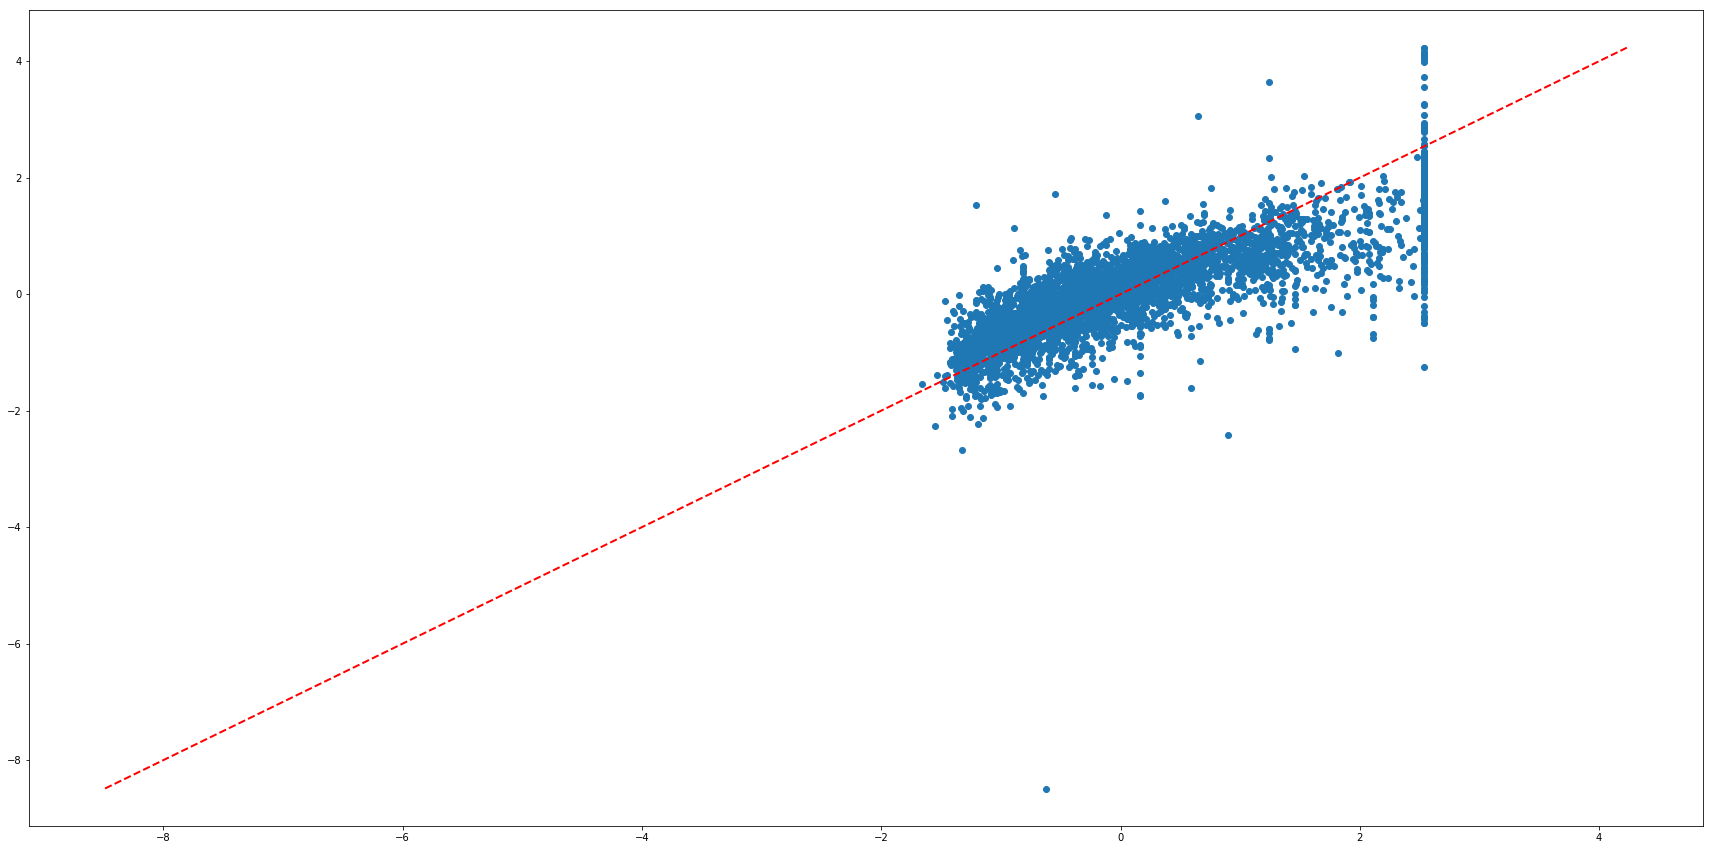

In [17]:
plt.figure(figsize = (30,15))
plt.scatter(scaled_Ytest,predictions)
plt.plot([predictions.min(),predictions.max()],[predictions.min(),predictions.max()],"k--",lw=2,color="red")

## 7. Perform Linear regression with one independent variable

In [18]:
features_1=["median_income"]
target_1=["median_house_value"]
x_1=housing_df[features_1]
y_1=housing_df[target_1]

X_train_1,X_test_1,Y_train_1,Y_test_1= train_test_split(x_1,y_1,test_size = 0.2)

In [19]:
scaler = StandardScaler()

scaled_Xtrain_1= scaler.fit_transform(X_train_1) 
scaled_Xtest_1= scaler.transform(X_test_1) 
scaled_Ytrain_1= scaler.fit_transform(Y_train_1)
scaled_Ytest_1= scaler.transform(Y_test_1)

/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/user/Downloads/desktop/ctps/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [20]:
model=LinearRegression()
model.fit(scaled_Xtrain_1,scaled_Ytrain_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
predictions_1=model.predict(scaled_Xtest_1)
predictions_1

array([[-0.74897656],
       [-0.14614553],
       [-0.8634935 ],
       ...,
       [ 0.09842708],
       [-0.25119468],
       [-0.46450912]])

In [22]:
Mean_squared_error_1=sm.mean_squared_error(scaled_Ytest_1,predictions_1)
print(f"Mean Squared Error : {Mean_squared_error_1}")
RMSE_1=np.sqrt(Mean_squared_error_1)
print(f"RMSE : {RMSE_1}")  

Mean Squared Error : 0.5546011675337725
RMSE : 0.7447154943559134


In [23]:
print("Mean absolute error =", round(sm.mean_absolute_error(scaled_Ytest_1, predictions_1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(scaled_Ytest_1, predictions_1), 2)) 
print("R2 score =", round(sm.r2_score(scaled_Ytest_1, predictions_1), 2))
print(f"Regression score : {model.score(scaled_Xtest_1 , scaled_Ytest_1 )}")

Mean absolute error = 0.55
Median absolute error = 0.44
R2 score = 0.48
Regression score : 0.4792108646620401


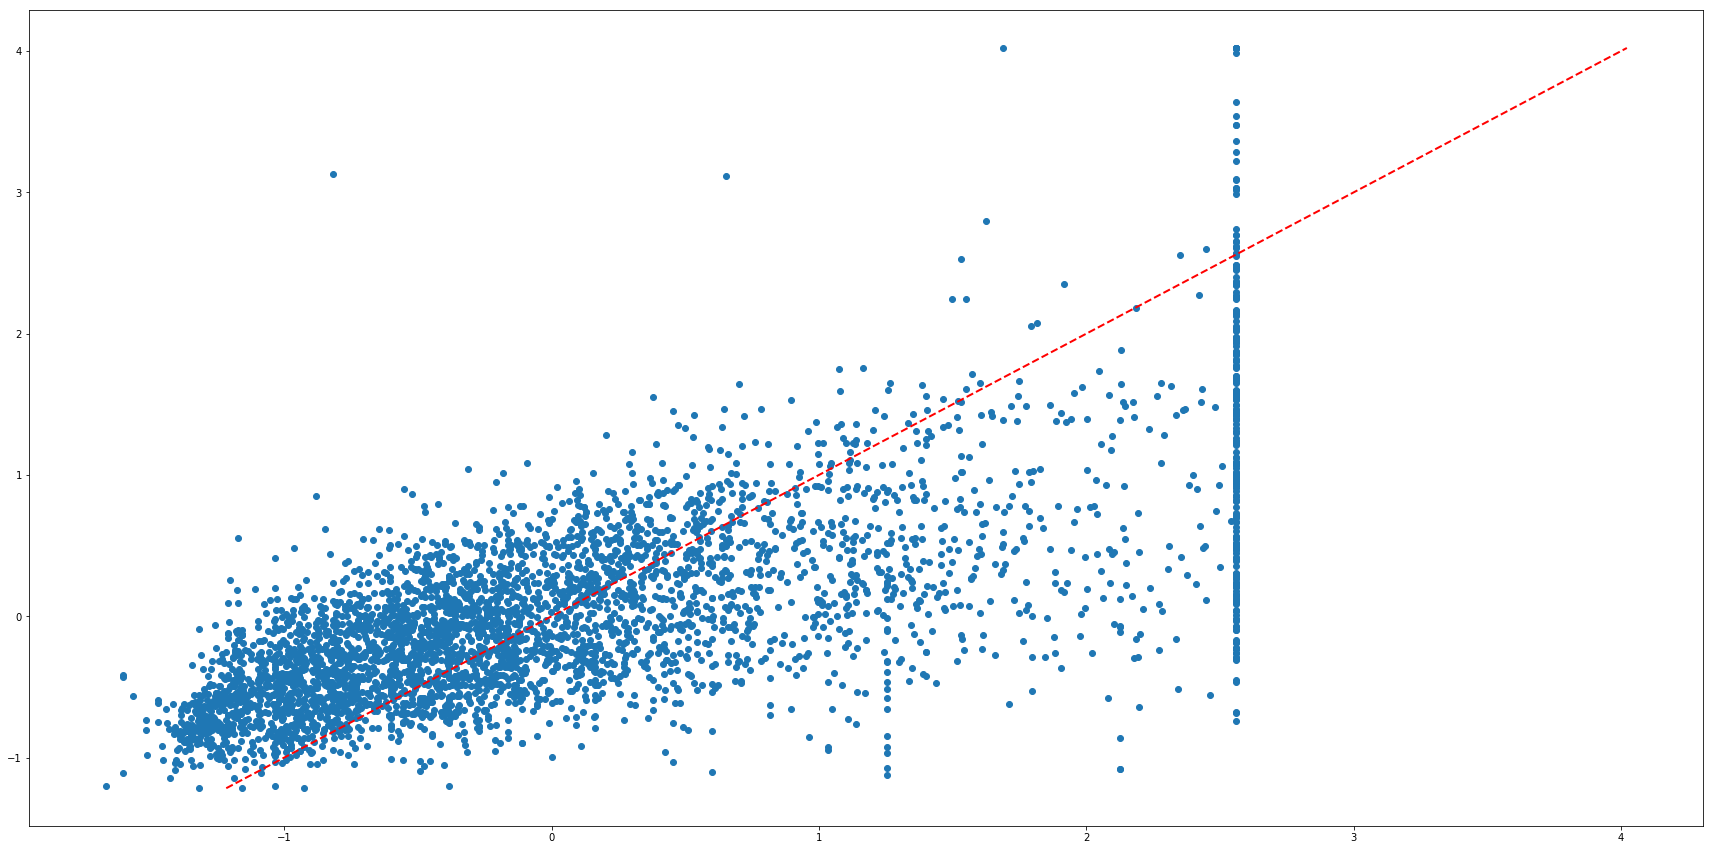

In [24]:
plt.figure(figsize = (30,15))
plt.scatter(scaled_Ytest_1,predictions_1)
plt.plot([predictions_1.min(),predictions_1.max()],[predictions_1.min(),predictions_1.max()],"k--",lw=2,color="red")

## The End